# The DataFrame has the shape:

data_dict = {

    'k_values_first': k_values_first,
    'differences_first': differences_first,
    'omega_values_first': omega_values_first,
    'interval_indices_first': interval_indices_first.tolist(),
    'normalized_omega_first': normalized_omega_first.tolist(),
    'normalized_differences_first': normalized_differences_first.tolist(),
    
    'k_values_second': k_values_second,
    'differences_second': differences_second,
    'omega_values_second': omega_values_second,
    'interval_indices_second': interval_indices_second.tolist(),
    'normalized_omega_second': normalized_omega_second.tolist(),
    'normalized_differences_second': normalized_differences_second.tolist(),
    
    'k_values_third': k_values_third,
    'differences_third': differences_third,
    'omega_values_third': omega_values_third,
    'interval_indices_third': interval_indices_third.tolist(),
    'normalized_omega_third': normalized_omega_third.tolist(),
    'normalized_differences_third': normalized_differences_third.tolist(),
    
    'interval_ranges': interval_ranges,
    'symbols': symbols,
    'labels': labels,
    'time': time.tolist(),
    'ln': ln,
    'overlap': overlap,
    'omegap': omegap
}

Is coming from notebook **3Dspectra.ipynb**

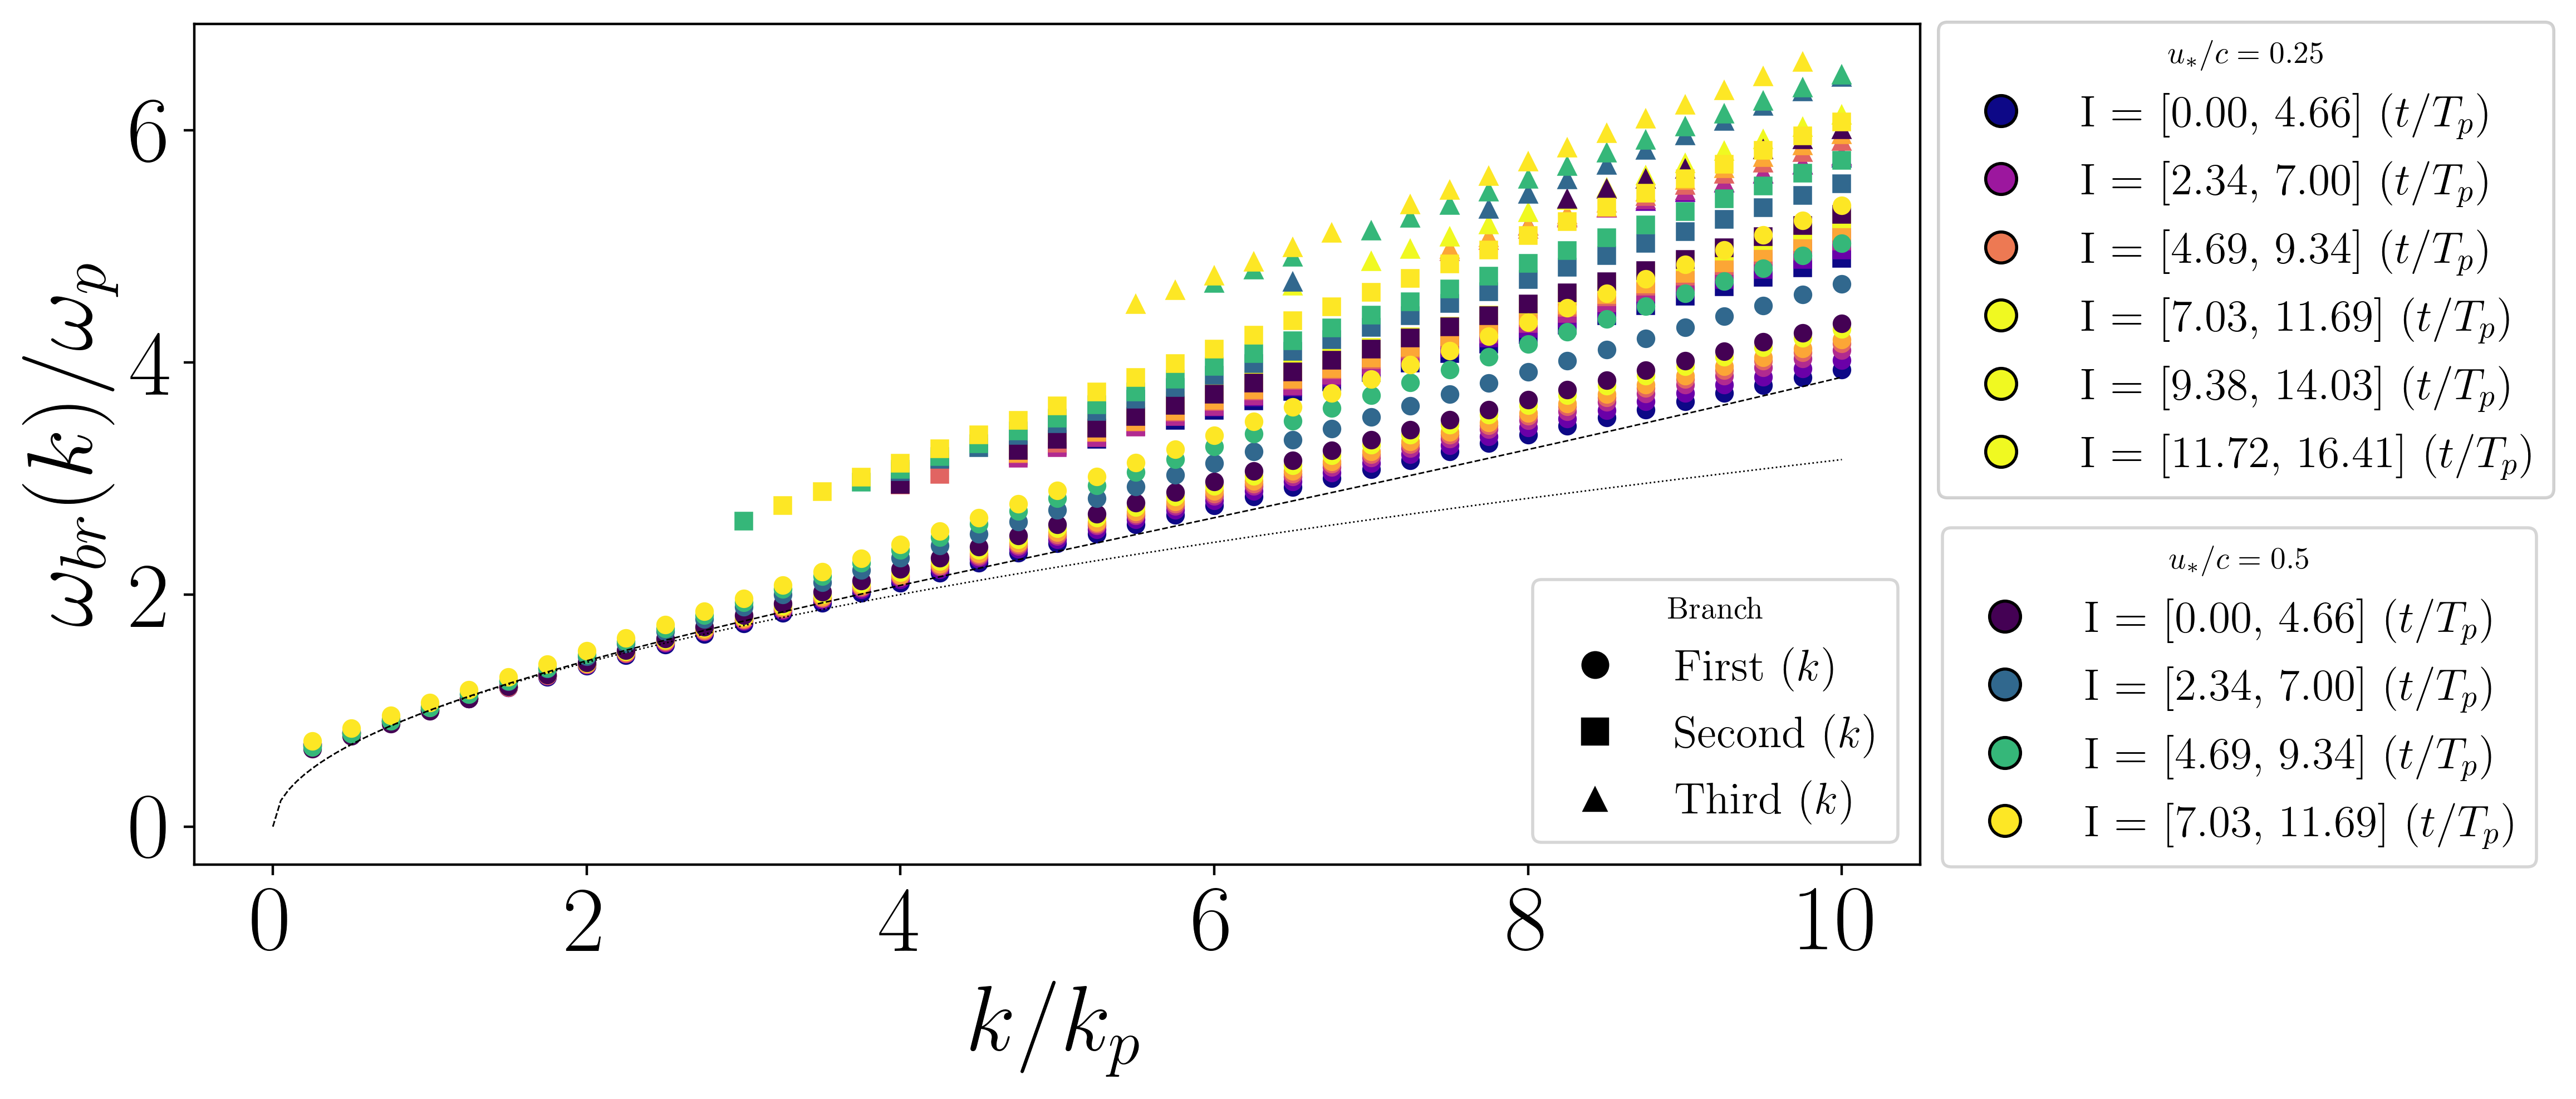

In [14]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Función para cargar un archivo JSON
def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# Archivos JSON
files = {
    'uc025': '/projects/DEIKE/cmartinb/omegas/kpHs0p16_uoc0p25.json',
    'uc05': '/projects/DEIKE/cmartinb/omegas/kpHs0p16_uoc0p50.json'
}

# Cargar los datos de los archivos JSON
data_dicts = {key: load_json(file) for key, file in files.items()}

# Convertir listas de vuelta a arrays de numpy para cada conjunto de datos
def convert_to_numpy(data_dict):
    data_dict['k_values_first'] = np.array(data_dict['k_values_first'])
    data_dict['differences_first'] = np.array(data_dict['differences_first'])
    data_dict['omega_values_first'] = np.array(data_dict['omega_values_first'])
    data_dict['interval_indices_first'] = np.array(data_dict['interval_indices_first'], dtype=int)
    data_dict['normalized_omega_first'] = np.array(data_dict['normalized_omega_first'])
    data_dict['normalized_differences_first'] = np.array(data_dict['normalized_differences_first'])

    data_dict['k_values_second'] = np.array(data_dict['k_values_second'])
    data_dict['differences_second'] = np.array(data_dict['differences_second'])
    data_dict['omega_values_second'] = np.array(data_dict['omega_values_second'])
    data_dict['interval_indices_second'] = np.array(data_dict['interval_indices_second'], dtype=int)
    data_dict['normalized_omega_second'] = np.array(data_dict['normalized_omega_second'])
    data_dict['normalized_differences_second'] = np.array(data_dict['normalized_differences_second'])

    data_dict['k_values_third'] = np.array(data_dict['k_values_third'])
    data_dict['differences_third'] = np.array(data_dict['differences_third'])
    data_dict['omega_values_third'] = np.array(data_dict['omega_values_third'])
    data_dict['interval_indices_third'] = np.array(data_dict['interval_indices_third'], dtype=int)
    data_dict['normalized_omega_third'] = np.array(data_dict['normalized_omega_third'])
    data_dict['normalized_differences_third'] = np.array(data_dict['normalized_differences_third'])

    data_dict['time'] = np.array(data_dict['time'])

    return data_dict

data_dicts = {key: convert_to_numpy(data_dict) for key, data_dict in data_dicts.items()}

# Paletas de colores para cada conjunto de datos
palettes = {
    'uc05': plt.cm.viridis,
    'uc025': plt.cm.plasma
}

# Graficar los datos cargados
fig, ax = plt.subplots(figsize=(10, 5), dpi=400)

for key, data_dict in data_dicts.items():
    interval_ranges = data_dict['interval_ranges']
    symbols = data_dict['symbols']
    labels = data_dict['labels']
    time = data_dict['time']
    ln = data_dict['ln']
    overlap = data_dict['overlap']
    omegap = data_dict['omegap']
    num_intervals = len(interval_ranges)
    
    # Colores para cada intervalo
    interval_colors = palettes[key](np.linspace(0, 1, num_intervals))

    # Graficar los puntos con colores diferentes según el intervalo
    start_idx = 0
    for i in range(num_intervals):
        time_subdivision = time[start_idx:start_idx+ln]

        idx_first = data_dict['interval_indices_first'] == i
        idx_second = data_dict['interval_indices_second'] == i
        idx_third = data_dict['interval_indices_third'] == i

        if np.any(idx_first):
            k_first = data_dict['k_values_first'][idx_first]
            ax.plot(k_first, (data_dict['normalized_omega_first'][idx_first]), symbols[0], markersize=5, color=interval_colors[i], label=interval_ranges[i] if key == 'uc05' and i == 0 else "")

        if np.any(idx_second):
            k_second = data_dict['k_values_second'][idx_second]
            ax.plot(k_second, (data_dict['normalized_omega_second'][idx_second]), symbols[1], markersize=5, color=interval_colors[i], label=interval_ranges[i] if key == 'uc025' and i == 0 else "")

        if np.any(idx_third):
            k_third = data_dict['k_values_third'][idx_third]
            ax.plot(k_third, (data_dict['normalized_omega_third'][idx_third]), symbols[2], markersize=5, color=interval_colors[i], label=interval_ranges[i] if key == 'uc025' and i == 0 else "")

        start_idx += (ln - overlap)
        if start_idx >= len(time):
            break

ax.set_xlabel(r'$k/k_p$')
ax.set_ylabel(r'$  \omega_{br}(k)/\omega_{p}$')

# Crear leyendas separadas para las ramas y los intervalos
first_legend = ax.legend(
    [plt.Line2D([0], [0], marker=s, color='w', markerfacecolor='black', markersize=10) for s in symbols],
    [label + ' $(k)$' for label in labels],
    loc='lower right', title='Branch'
)
ax.add_artist(first_legend)

g = 1
rho = 1
k_diss = np.linspace(0, 40, 200)
dispersion_relation = np.sqrt(k_diss * g)
sigma = (g - 1.25 * 10**(-3)) / (200*4**2)
dispersion_relation_tension = np.sqrt(k_diss * g + sigma/rho * k_diss**3)
ax.plot(k_diss / 4, dispersion_relation / omegap, ':', lw=0.5, c='black', label=r"$\omega= \sqrt{gk}$")
ax.plot(k_diss / 4, dispersion_relation_tension / omegap, '--', lw=0.5, c='black', label=r"$\omega= \sqrt{gk + \sigma/\rho k^3}$")

# Crear las leyendas de intervalos para cada conjunto de datos
handles_uc05 = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palettes['uc05'](i / (num_intervals - 1)), markersize=10, markeredgecolor='k') for i in range(len(data_dicts['uc05']['interval_ranges']))]
handles_uc025 = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palettes['uc025'](i / (num_intervals - 1)), markersize=10, markeredgecolor='k') for i in range(len(data_dicts['uc025']['interval_ranges']))]

# Añadir las leyendas al gráfico
legend_uc05 = ax.legend(handles_uc05, data_dicts['uc05']['interval_ranges'], loc='lower left', title=r'$u_\ast/c = 0.5$', bbox_to_anchor=(1, -0.029))
ax.add_artist(legend_uc05)

legend_uc025 = ax.legend(handles_uc025, data_dicts['uc025']['interval_ranges'], loc='lower right', title=r'$u_\ast/c = 0.25$', bbox_to_anchor=(1.38, 0.41))
ax.add_artist(legend_uc025)

plt.show()

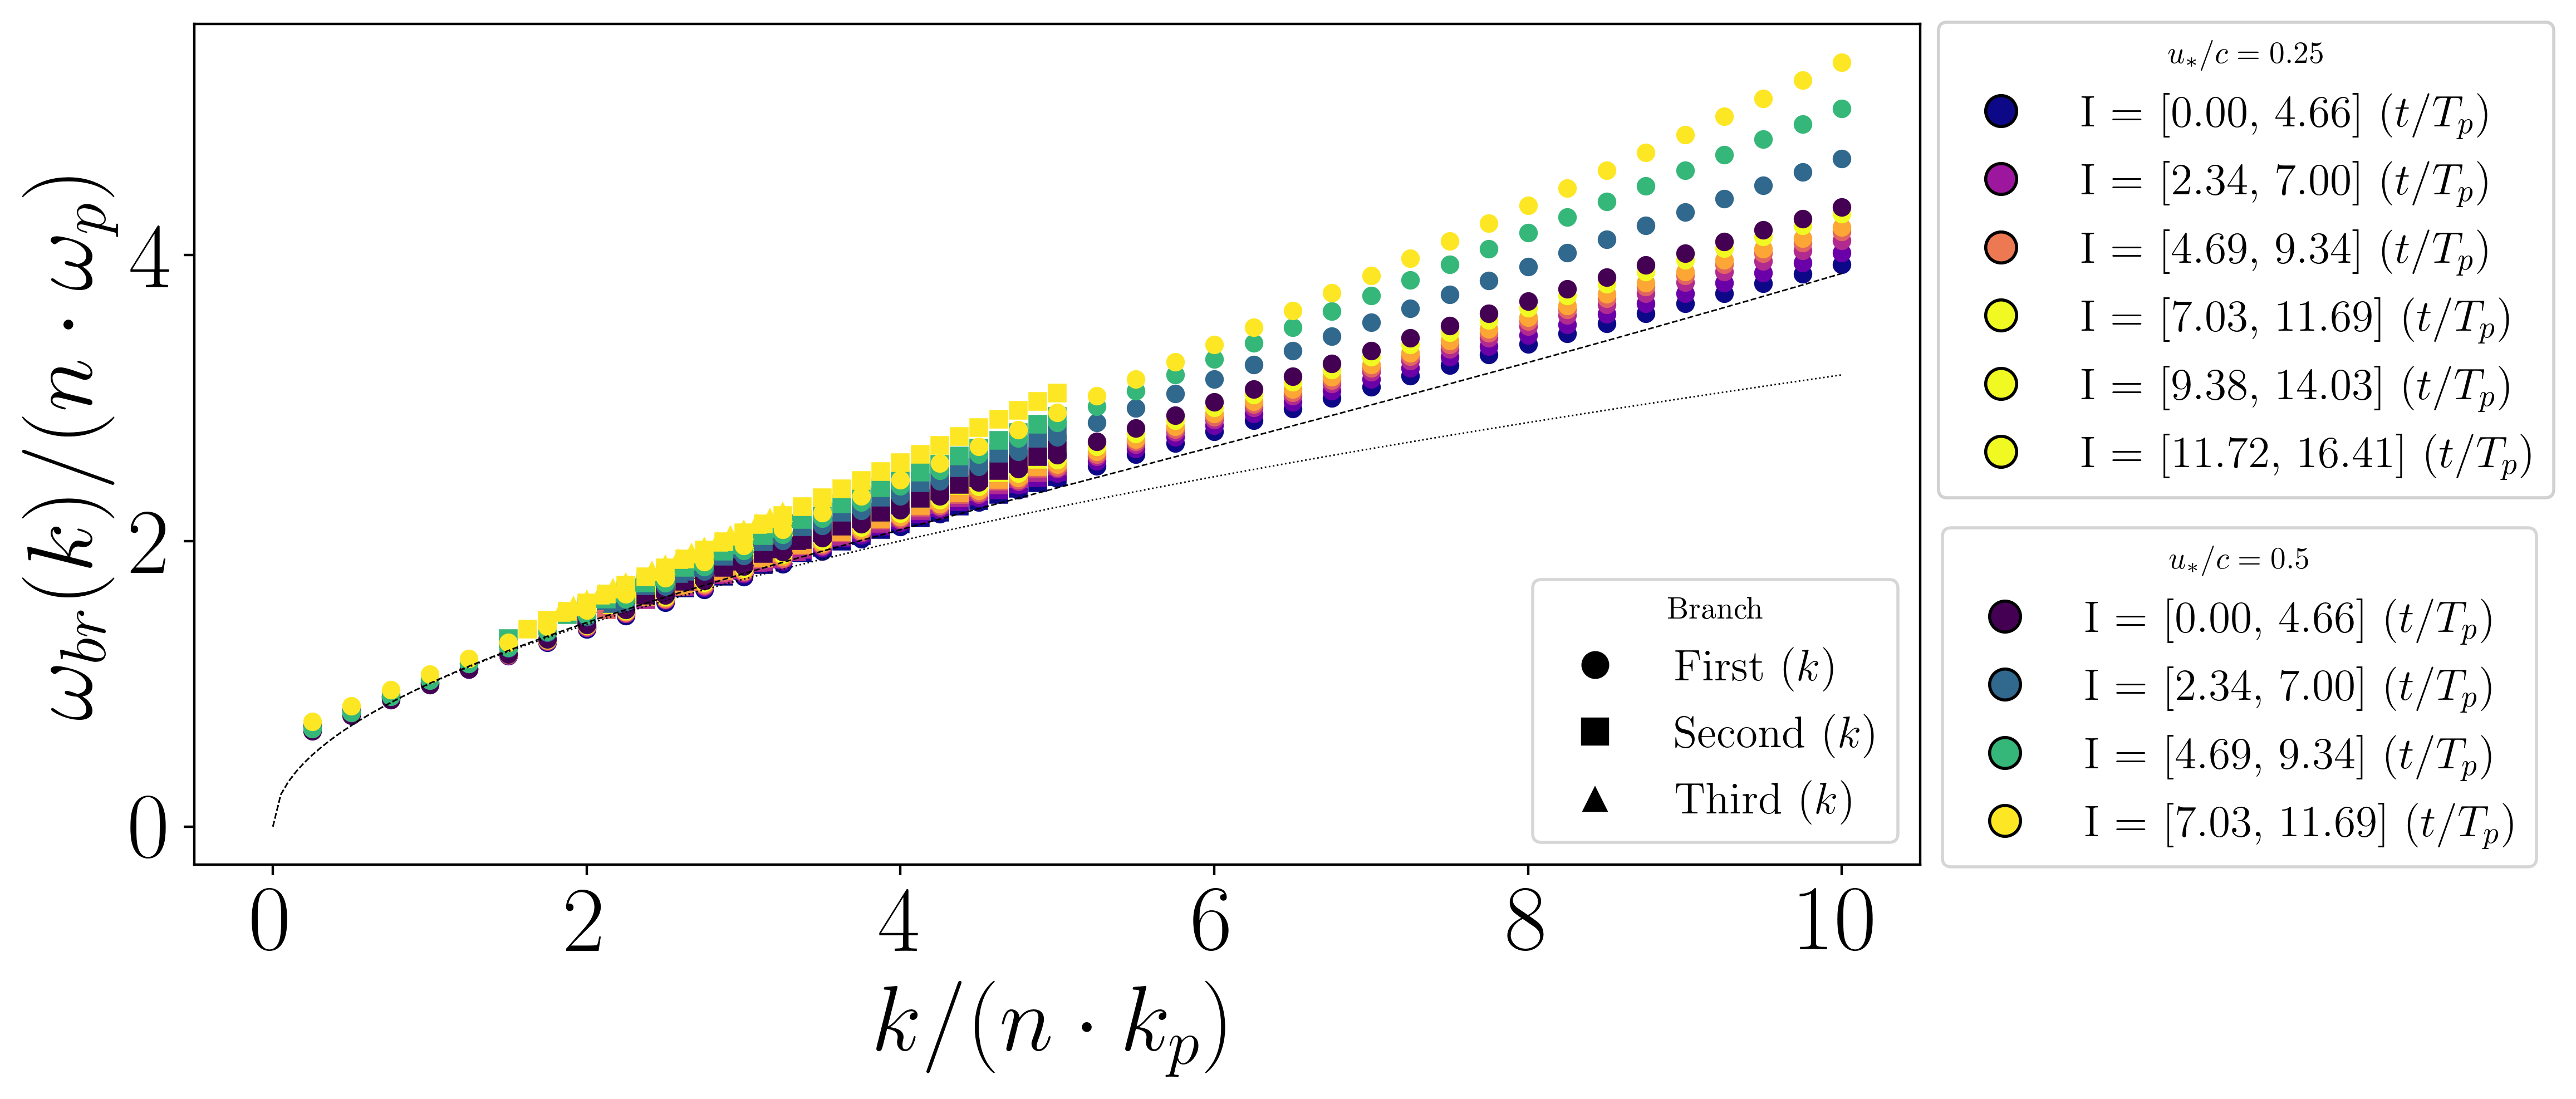

In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Función para cargar un archivo JSON
def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# Archivos JSON
files = {
    'uc025': '/projects/DEIKE/cmartinb/omegas/kpHs0p16_uoc0p25.json',
    'uc05': '/projects/DEIKE/cmartinb/omegas/kpHs0p16_uoc0p50.json'
}

# Cargar los datos de los archivos JSON
data_dicts = {key: load_json(file) for key, file in files.items()}

# Convertir listas de vuelta a arrays de numpy para cada conjunto de datos
def convert_to_numpy(data_dict):
    data_dict['k_values_first'] = np.array(data_dict['k_values_first'])
    data_dict['differences_first'] = np.array(data_dict['differences_first'])
    data_dict['omega_values_first'] = np.array(data_dict['omega_values_first'])
    data_dict['interval_indices_first'] = np.array(data_dict['interval_indices_first'], dtype=int)
    data_dict['normalized_omega_first'] = np.array(data_dict['normalized_omega_first'])
    data_dict['normalized_differences_first'] = np.array(data_dict['normalized_differences_first'])

    data_dict['k_values_second'] = np.array(data_dict['k_values_second'])
    data_dict['differences_second'] = np.array(data_dict['differences_second'])
    data_dict['omega_values_second'] = np.array(data_dict['omega_values_second'])
    data_dict['interval_indices_second'] = np.array(data_dict['interval_indices_second'], dtype=int)
    data_dict['normalized_omega_second'] = np.array(data_dict['normalized_omega_second'])
    data_dict['normalized_differences_second'] = np.array(data_dict['normalized_differences_second'])

    data_dict['k_values_third'] = np.array(data_dict['k_values_third'])
    data_dict['differences_third'] = np.array(data_dict['differences_third'])
    data_dict['omega_values_third'] = np.array(data_dict['omega_values_third'])
    data_dict['interval_indices_third'] = np.array(data_dict['interval_indices_third'], dtype=int)
    data_dict['normalized_omega_third'] = np.array(data_dict['normalized_omega_third'])
    data_dict['normalized_differences_third'] = np.array(data_dict['normalized_differences_third'])

    data_dict['time'] = np.array(data_dict['time'])

    return data_dict

data_dicts = {key: convert_to_numpy(data_dict) for key, data_dict in data_dicts.items()}

# Paletas de colores para cada conjunto de datos
palettes = {
    'uc05': plt.cm.viridis,
    'uc025': plt.cm.plasma
}

# Graficar los datos cargados
fig, ax = plt.subplots(figsize=(10, 5), dpi=400)

for key, data_dict in data_dicts.items():
    interval_ranges = data_dict['interval_ranges']
    symbols = data_dict['symbols']
    labels = data_dict['labels']
    time = data_dict['time']
    ln = data_dict['ln']
    overlap = data_dict['overlap']
    omegap = data_dict['omegap']
    num_intervals = len(interval_ranges)
    
    # Colores para cada intervalo
    interval_colors = palettes[key](np.linspace(0, 1, num_intervals))

    # Graficar los puntos con colores diferentes según el intervalo
    start_idx = 0
    for i in range(num_intervals):
        time_subdivision = time[start_idx:start_idx+ln]

        idx_first = data_dict['interval_indices_first'] == i
        idx_second = data_dict['interval_indices_second'] == i
        idx_third = data_dict['interval_indices_third'] == i

        if np.any(idx_first):
            k_first = data_dict['k_values_first'][idx_first]
            ax.plot(k_first, (data_dict['normalized_omega_first'][idx_first]), symbols[0], markersize=5, color=interval_colors[i], label=interval_ranges[i] if key == 'uc05' and i == 0 else "")

        if np.any(idx_second):
            k_second = data_dict['k_values_second'][idx_second]
            ax.plot(k_second/2, (data_dict['normalized_omega_second'][idx_second])/2, symbols[1], markersize=5, color=interval_colors[i], label=interval_ranges[i] if key == 'uc025' and i == 0 else "")

        if np.any(idx_third):
            k_third = data_dict['k_values_third'][idx_third]
            ax.plot(k_third/3, (data_dict['normalized_omega_third'][idx_third])/3, symbols[2], markersize=5, color=interval_colors[i], label=interval_ranges[i] if key == 'uc025' and i == 0 else "")

        start_idx += (ln - overlap)
        if start_idx >= len(time):
            break

ax.set_xlabel(r'$k/(n \cdot k_p)$')
ax.set_ylabel(r'$  \omega_{br}(k)/(n \cdot \omega_{p})$')

# Crear leyendas separadas para las ramas y los intervalos
first_legend = ax.legend(
    [plt.Line2D([0], [0], marker=s, color='w', markerfacecolor='black', markersize=10) for s in symbols],
    [label + ' $(k)$' for label in labels],
    loc='lower right', title='Branch'
)
ax.add_artist(first_legend)

g = 1
rho = 1
k_diss = np.linspace(0, 40, 200)
dispersion_relation = np.sqrt(k_diss * g)
sigma = (g - 1.25 * 10**(-3)) / (200*4**2)
dispersion_relation_tension = np.sqrt(k_diss * g + sigma/rho * k_diss**3)
ax.plot(k_diss / 4, dispersion_relation / omegap, ':', lw=0.5, c='black', label=r"$\omega= \sqrt{gk}$")
ax.plot(k_diss / 4, dispersion_relation_tension / omegap, '--', lw=0.5, c='black', label=r"$\omega= \sqrt{gk + \sigma/\rho k^3}$")

# Crear las leyendas de intervalos para cada conjunto de datos
handles_uc05 = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palettes['uc05'](i / (num_intervals - 1)), markersize=10, markeredgecolor='k') for i in range(len(data_dicts['uc05']['interval_ranges']))]
handles_uc025 = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palettes['uc025'](i / (num_intervals - 1)), markersize=10, markeredgecolor='k') for i in range(len(data_dicts['uc025']['interval_ranges']))]

# Añadir las leyendas al gráfico
legend_uc05 = ax.legend(handles_uc05, data_dicts['uc05']['interval_ranges'], loc='lower left', title=r'$u_\ast/c = 0.5$', bbox_to_anchor=(1, -0.029))
ax.add_artist(legend_uc05)

legend_uc025 = ax.legend(handles_uc025, data_dicts['uc025']['interval_ranges'], loc='lower right', title=r'$u_\ast/c = 0.25$', bbox_to_anchor=(1.38, 0.41))
ax.add_artist(legend_uc025)

plt.show()
